# HW1: Practice with Python, hard-margin SVM, and linear regression

## Leo Xiong ; tlxiong

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set or installing libraries.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01 assignment
  - HW01.html to the same assignment by clicking 'Add Another File'

  As a check, download your HW01.ipynb from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the new '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
- Make an X from the wt (weight in 1000s of pounds) and mpg (miles per gallon) columns. Make y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

C:\Users\leoxi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leoxi\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\leoxi\AppData\Local\Temp\ipykernel_25296\1776127532.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1, x2], [y1_upper, y2_upper], 'k--', label='+1 Support wx+b=1', color = 'green')
C:\Users\leoxi\AppData\Local\Temp\ipykernel_25296\1776127532.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.

Model = -8.24 * weight + -0.309 * mileage + 32 = 0
Coefficients: -8.24, -0.309
Intercept: 32
Accuracy: 1.0
Transmission Type (Prediction): 0


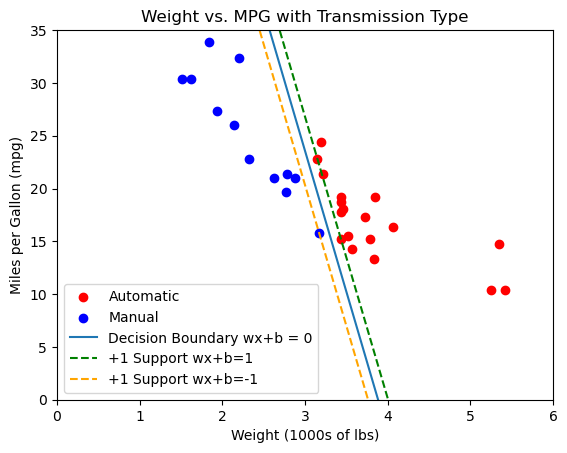

In [2]:
# ... your code here ...
mtcars = pd.read_csv('mtcars30.csv', index_col=0)
X = mtcars[['wt', 'mpg']]
y = mtcars[['am']]


model = svm.SVC(kernel='linear', C=1000)
model.fit(X, y)

coef_ = model.coef_
int_ = model.intercept_

accuracy = model.score(X, y)

carpredict = model.predict([[4, 20]])



x1, x2 = -1, 4  

y1 = -(coef_[0][0]  * x1 + int_) / coef_[0][1]
y2 = -(coef_[0][0]  * x2 + int_) / coef_[0][1]
y1_upper = -(coef_[0][0] * x1 + int_ + 1) / coef_[0][1]
y2_upper = -(coef_[0][0]  * x2 + int_ + 1) / coef_[0][1]
y1_lower = -(coef_[0][0]  * x1 + int_ - 1) / coef_[0][1]
y2_lower = -(coef_[0][0]  * x2 + int_ - 1) / coef_[0][1]


print(f"Model = {coef_[0][0]:.{3}g} * weight + {coef_[0][1]:.{3}g} * mileage + {int_[0]:.{3}g} = 0")
print(f"Coefficients: {coef_[0][0]:.{3}g}, {coef_[0][1]:.{3}g}")
print(f"Intercept: {int_[0]:.{3}g}")
print(f"Accuracy: {accuracy}")
print(f"Transmission Type (Prediction): {carpredict[0]}")


plt.scatter(mtcars[mtcars['am'] == 0]['wt'], mtcars[mtcars['am'] == 0]['mpg'], color='red', label="Automatic")
plt.scatter(mtcars[mtcars['am'] == 1]['wt'], mtcars[mtcars['am'] == 1]['mpg'], color='blue', label="Manual")
plt.plot([x1, x2], [y1, y2], label='Decision Boundary wx+b = 0')
plt.plot([x1, x2], [y1_upper, y2_upper], 'k--', label='+1 Support wx+b=1', color = 'green')
plt.plot([x1, x2], [y1_lower, y2_lower], 'k--', label='+1 Support wx+b=-1', color ='orange')

plt.ylim(0, 35)
plt.xlim(0, 6)

plt.xlabel("Weight (1000s of lbs)")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("Weight vs. MPG with Transmission Type")
plt.legend()
plt.show()



We predict that a car weighing 20 thousand pounds that gets 20 mpg has transmission type 0 (0=automatic, 1=manual)

# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

(just give the model, $y = w x + b$, specifying its slope and intercept; you do not need to show your work) <br>
<br>
*Answer:* $y = -0.5x +4$ <br>
**(Slope = -0.5, intercept = 4)**

## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol').)
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

The model is Volume = 2.68e-05 * (Market Capitalization) + 3.41e+06.
Slope: 2.68e-05
Intercept: 3.41e+06
R2 Score: 0.705
Prediction: 1.01e+07


C:\Users\leoxi\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\leoxi\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Average Daily Trading Volume')

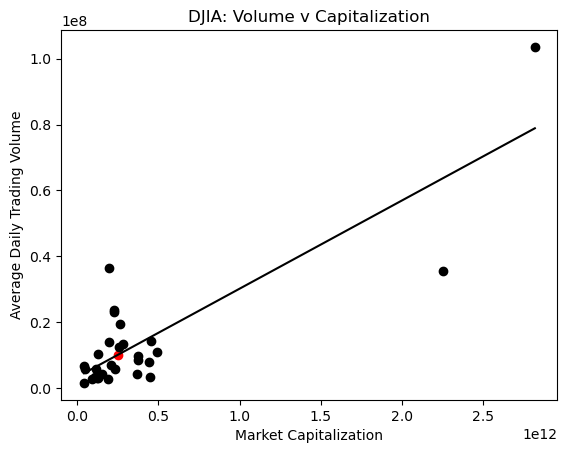

In [3]:
# # ... your code here ...
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol')
x = df[['MarketCap']]
y = df['AvgVol']

model = linear_model.LinearRegression()
model.fit(x,y)

intercept = model.intercept_
slope = model.coef_[0]
r2_score = model.score(x, y)

market_cap = np.array([[0.25e12]])
market_cap_predict = model.predict(market_cap)

print(f"The model is Volume = {slope:.{3}g} * (Market Capitalization) + {intercept:.{3}g}.")
print(f"Slope: {slope:.{3}g}")
print(f"Intercept: {intercept:.{3}g}")
print(f"R2 Score: {r2_score:.{3}g}")
print(f"Prediction: {market_cap_predict[0]:.{3}g}")

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.plot(x_range, y_pred, color = 'black')
plt.scatter(market_cap, market_cap_predict, color = 'red')
plt.scatter(x, y, color = 'black')
plt.title("DJIA: Volume v Capitalization")
plt.xlabel("Market Capitalization")
plt.ylabel("Average Daily Trading Volume")

We predict a volume of 1.01e+07 for a company with  Market Capitalization 0.25e12. <br>
As Market Cap increases, the volume also increases

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases (while holding the other variable fixed). (Use a Markdown cell.)

In [4]:
# ... your code here ...
y = df[['AvgVol']]
x = df[['MarketCap', 'Price']]

model = linear_model.LinearRegression()
model.fit(x, y)

intercept = model.intercept_[0]
slope1, slope2 = model.coef_[0]
r2_score = model.score(x, y)


print(f"Model: {slope1:.{3}g} * (Market Cap) + {slope2:.{3}g} * Price + {intercept:.{3}g} ")
print(f"R2 Score is {r2_score:.{3}g}")

Model: 2.89e-05 * (Market Cap) + -6.69e+04 * Price + 1.44e+07 
R2 Score is 0.823


As Market Capitalization increases,  the market cap also increases (positive coef) <br>
As Volume as price increases, the price decreases volume (negative coef)